In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
from imblearn.over_sampling import RandomOverSampler

In [150]:
df = pd.read_csv('datasets/daily_houston_data.csv').dropna()

In [151]:
df = df[df['date'] > '2010-01-01']

In [173]:
df

,date,temperature,dewpoint_temperature,relative_humidity,cloud_cover,precipitation,rain_tomorrow
1827,2010-01-02,5.967917,-0.027500,0.682500,0.456667,0.00,0
1828,2010-01-03,6.896667,1.938750,0.708333,0.963750,0.00,0
1829,2010-01-04,6.957500,1.836667,0.705417,0.760833,0.00,0
1830,2010-01-05,2.584583,-3.475000,0.659167,0.026667,0.00,0
1831,2010-01-06,5.337083,1.373333,0.764167,0.565000,0.00,1
...,...,...,...,...,...,...,...
6569,2022-12-27,6.512500,-1.231667,0.596667,0.014583,0.00,0
6570,2022-12-28,11.225417,6.572500,0.751250,0.433333,0.00,1
6571,2022-12-29,21.205833,18.112500,0.836250,0.508750,7.53,1
6572,2022-12-30,18.987917,16.593750,0.865833,0.804167,12.48,0


<AxesSubplot:>

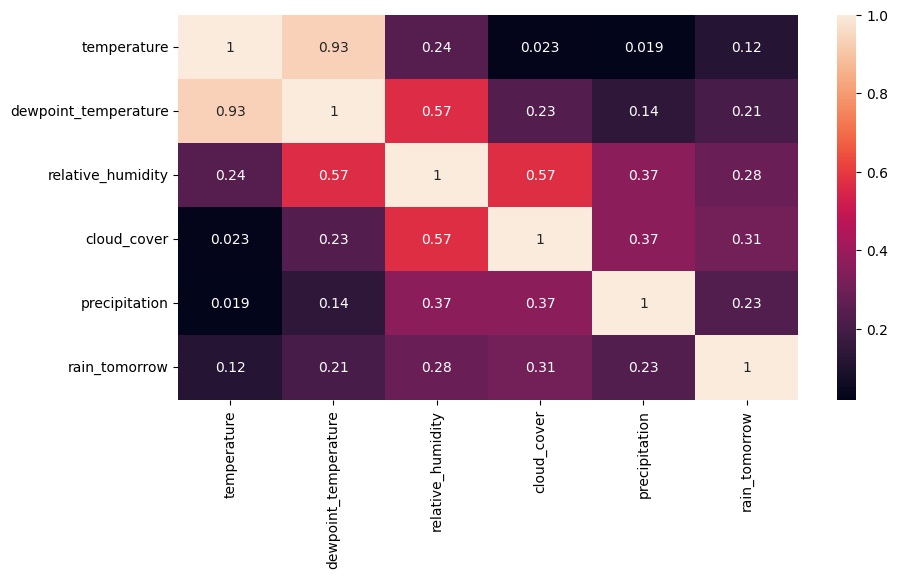

In [152]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

In [153]:
df.rain_tomorrow.value_counts()

0    3610
1    1137
Name: rain_tomorrow, dtype: int64

In [154]:
resampler =  RandomOverSampler(sampling_strategy='minority', random_state=42)

In [155]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [156]:
input_cols = ['precipitation']

In [157]:
x_train = train[input_cols]

y_train = train[['rain_tomorrow']]

In [158]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = resampler.fit_resample(x_train, y_train)
y_train_resampled.value_counts()

rain_tomorrow
0                2171
1                2171
dtype: int64

In [159]:
x_test = test[input_cols]

y_test = test[['rain_tomorrow']]

In [160]:
model = LogisticRegression()  
model.fit(x_train_resampled, y_train_resampled)

c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [161]:
model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [162]:
print('Score: {:.2f}'.format(model.score(x_train_resampled,y_train_resampled)*100))

Score: 64.62


In [163]:
print('Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Score: 75.79


<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='precipitation', ylabel='rain_tomorrow'>

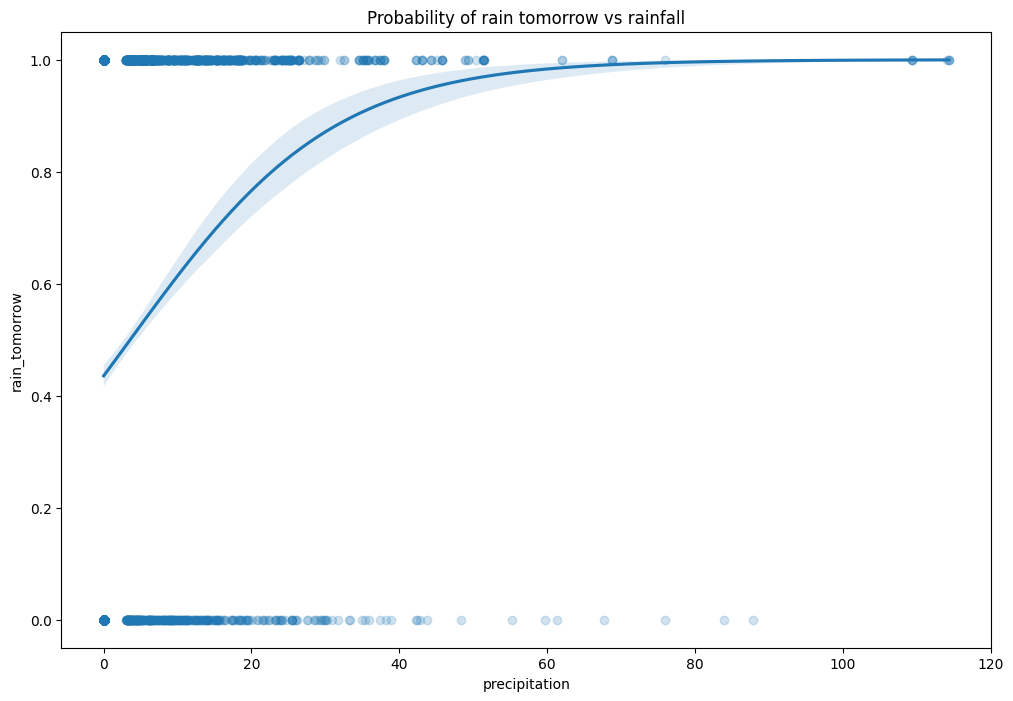

In [164]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_resampled.precipitation, y=y_train_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

In [165]:
scaler = MinMaxScaler().fit(df[['precipitation', 'rain_tomorrow']])

In [166]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['precipitation', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(train_scaled[['precipitation', 'rain_tomorrow']])
validate_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(validate_scaled[['precipitation', 'rain_tomorrow']])
test_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(test_scaled[['precipitation', 'rain_tomorrow']])

In [167]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['precipitation', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['precipitation']] = scaler.fit_transform(train_scaled[['precipitation']])
validate_scaled[['precipitation']] = scaler.fit_transform(validate_scaled[['precipitation']])
test_scaled[['precipitation']] = scaler.fit_transform(test_scaled[['precipitation']])

In [168]:
x_train_scaled = train_scaled[['precipitation']]
y_train_scaled = train_scaled[['rain_tomorrow']]

In [169]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_scaled_resampled, y_train_scaled_resampled = resampler.fit_resample(x_train_scaled, y_train_scaled)

In [170]:
x_test_scaled = test_scaled[['precipitation']]

y_test_scaled = test_scaled[['rain_tomorrow']]

In [171]:
model_scaled = LogisticRegression()  
model_scaled.fit(x_train_scaled_resampled, y_train_scaled_resampled)
print('Score: {:.2f}'.format(model.score(x_test_scaled,y_test_scaled)*100))

Score: 76.63


c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='precipitation', ylabel='rain_tomorrow'>

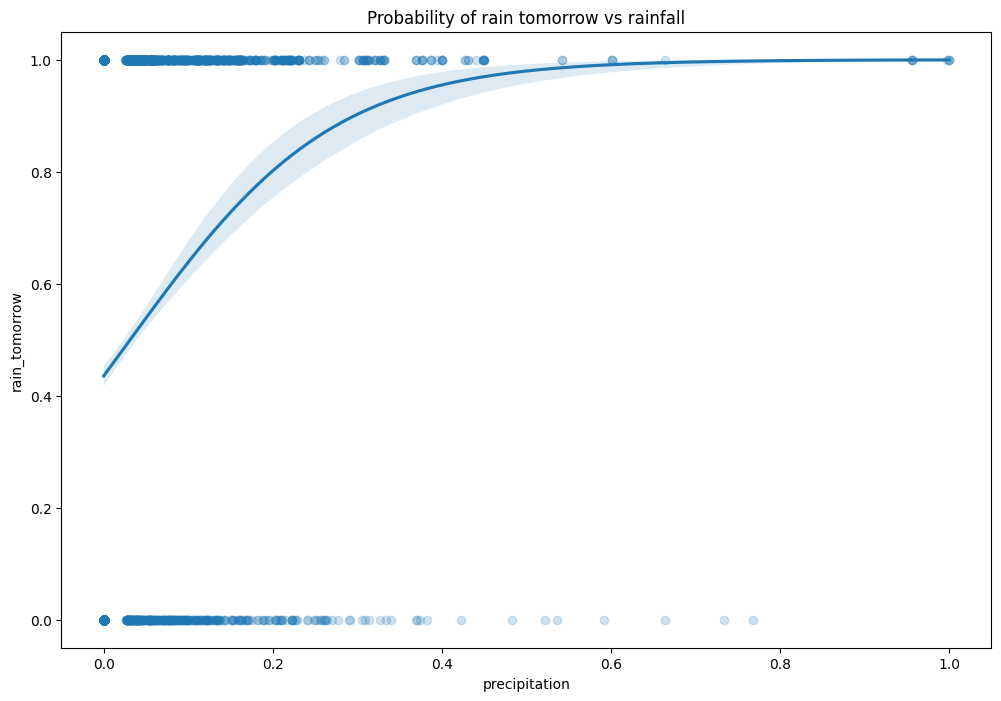

In [172]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_scaled_resampled.precipitation, y=y_train_scaled_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})